In [137]:
import logging
logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(asctime)s: %(message)s')

import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
from scipy.fft import fft, fftfreq
import ipywidgets as widgets

plt.rcParams.update({'font.size': 20})

%matplotlib inline

## Power spectral density:

##### Power vs. energy: Power = Energy / Time
##### Parseval’s theorem
##### observe the coded example and answer the following:
##### 1) point the differences in the PSD when calculated using the welch method
##### 2) what in the welch method is the cause fo the differences? is it an improvement?
##### 3) observe the inputs to the welch function - explain them

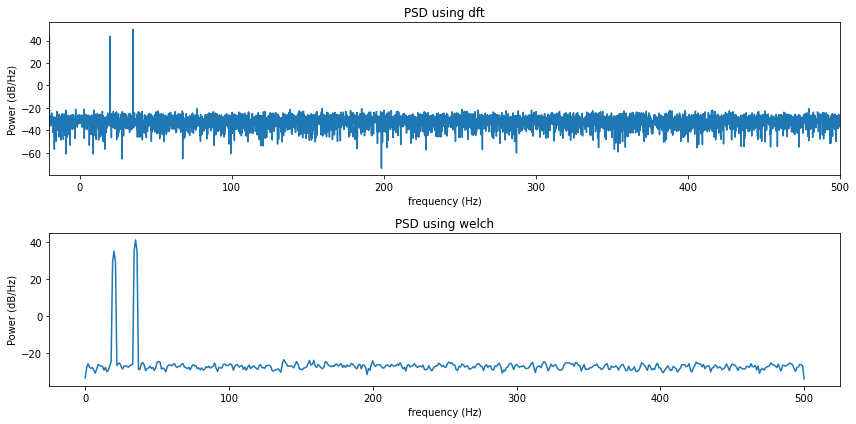

In [122]:
# parameters:

fs = 1000                                        # sampling frequency
duration = 10                                    # in seconds
dt = 1/fs                                        # delta t, 1 divided by sampling frequency
t = np.arange(0,duration,dt)
# creating a periodic signal with a stochastic process added to it:
y = 100*np.cos(2*np.pi*20*t) + 200*np.sin(2*np.pi*35*t) + np.random.randn(len(t))    
# PSD using fourier transform:
Pxx1 = np.abs(fft(y))**2 / (len(y)*fs)  # we square to get the Energy, and devide by n*fs to get PSD
f1 = fftfreq(len(y), d=dt)
# PSD using the welch method
f2, Pxx2 = sig.welch(y, nperseg=1000, noverlap=0, nfft=1000, fs=fs)
# plotting:
fig, ax = plt.subplots(nrows=2, figsize=(12,6))
ax[0].plot(f1, 10*np.log10(Pxx1))
ax[0].set_title('PSD using dft');  ax[0].set_ylabel('Power (dB/Hz)'); ax[0].set_xlabel('frequency (Hz)')
ax[0].set_xlim([-20,500]) # artificially equalize x display range 
ax[1].plot(f2, 10*np.log10(Pxx2))
ax[1].set_title('PSD using welch');  ax[1].set_ylabel('Power (dB/Hz)'); ax[1].set_xlabel('frequency (Hz)')
fig.tight_layout()

### spectrograms

##### 1) why would we use a spectrogram?
##### 2) what are the hyperparameters to the spectrograms?
##### 3) what are the differences between the two spectrograms shown below?

Text(0.5, 0.98, 'quadratic chirp')

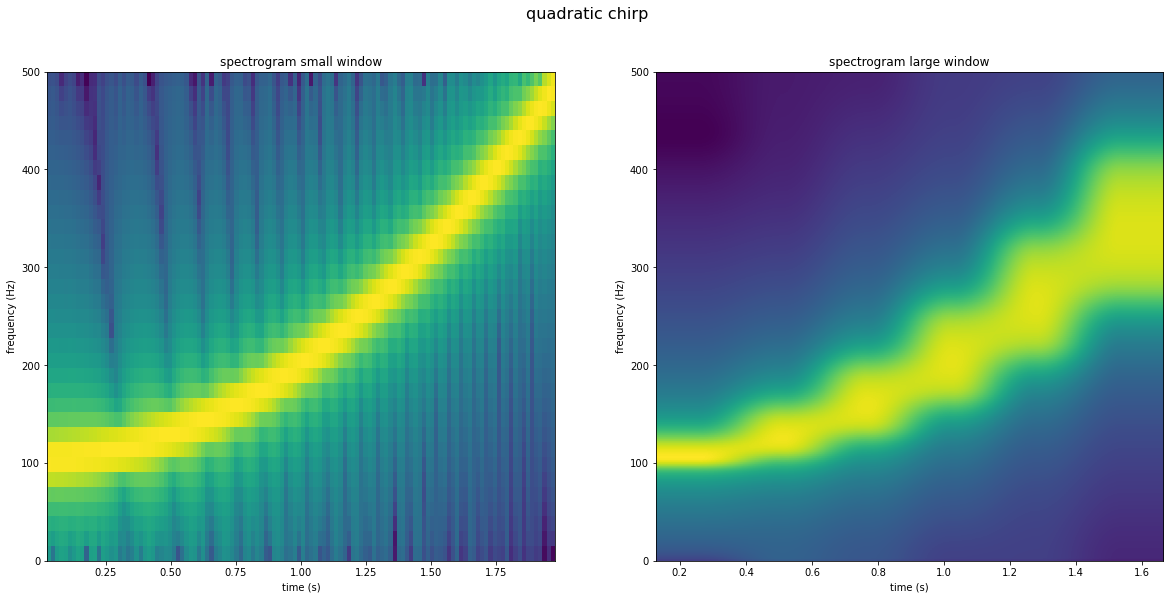

In [67]:
fs = 1000                                        # sampling frequency
duration = 2                                     # in seconds
dt = 1/fs                                        # delta t, 1 divided by sampling frequency
t = np.arange(0,duration,dt)
y = sig.chirp(t,100,1,200,method='quadratic')

fig, ax = plt.subplots(figsize=(20,9), ncols=2)

__ = ax[0].specgram(y, Fs=fs, NFFT=64, noverlap=48)
ax[0].set_title('spectrogram small window');  ax[0].set_ylabel('frequency (Hz)'); ax[0].set_xlabel('time (s)')
pxx,  freq, t, cax = ax[1].specgram(y, Fs=fs, NFFT=512, noverlap=256)
ax[1].set_title('spectrogram large window');  ax[1].set_ylabel('frequency (Hz)'); ax[1].set_xlabel('time (s)')
fig.suptitle('quadratic chirp', fontsize=16)
# pl.colorbar(cax)

### Coherence

##### Play with the following widget, answer the following:
##### What effect do changes in phase have on coherence?
##### What happens to coherence when signal are at different frequencies?
##### Is there a state where there is a peak in coherence despite difference in frequencies?
##### What effect does the amplitude of the noise have on coherence?


In [124]:
fs = 1000                                        # sampling frequency
duration = 100                                   # in seconds
dt = 1/fs                                        # delta t, 1 divided by sampling frequency
alpha=0                                          # sig1 phase shift
beta= np.pi                                      # sig2 phase shift
f1=20                                            # sig1 frequency
f2=20                                            # sig2 frequency
noise_amp = 0.25                                 # amplitude of noise
freq_inds = np.arange(1,50)                      # indices of requencies to plot, ignoring first to counteract DC.

def interactive_coherence(alpha, beta, f1, f2, noise_amp):

    t = np.arange(0,duration,dt)
    p_lim = [0, 0.5]
    t_lim = [0, 0.25]
    sig1 = np.sin(2*np.pi*f1*t+alpha) + noise_amp*np.random.randn(len(t))
    sig2 = np.sin(2*np.pi*f2*t+beta) + noise_amp*np.random.randn(len(t))
    # calculationg cross spectrum
    f, Pxy = sig.csd(sig1, sig2, fs=fs, nperseg=1000)
    # calculating coherence
    f2, Cxy = sig.coherence(sig1, sig2, fs=fs, nperseg=1000)
    # plotting
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
    ax[0,0].plot(t, sig1)
    ax[0,0].set_title('signal 1');  ax[0,0].set_xlim(t_lim); ax[0,0].set_xlabel('time (s)')
    ax[0,1].plot(t, sig2)
    ax[0,1].set_title('signal 2 - phase shifted');  ax[0,1].set_xlim(t_lim); ax[0,1].set_xlabel('time (s)')
    ax[1,0].plot(f[freq_inds], abs(Pxy[freq_inds]))
    ax[1,0].set_title('Cross spectrum density');  ax[1,0].set_ylabel('Power(dB/Hz)'); ax[1,0].set_xlabel('frequency (Hz)')
    ax[1,1].plot(f2[freq_inds], Cxy[freq_inds])
    ax[1,1].set_title('Coherence');  ax[1,1].set_ylabel('Magnitude(squared coherence)'); ax[1,1].set_xlabel('frequency (Hz)')
    fig.tight_layout()
    
__ = widgets.interact(interactive_coherence, alpha=(0,np.pi*1.25,0.25*np.pi), beta=(0,np.pi*1.25,0.25*np.pi),
                     f1=(5,40,5), f2=(5,40,5), noise_amp=[0.25,1,5,20,50])

interactive(children=(FloatSlider(value=1.5707963267948966, description='alpha', max=3.9269908169872414, step=…

### Coherence Steps

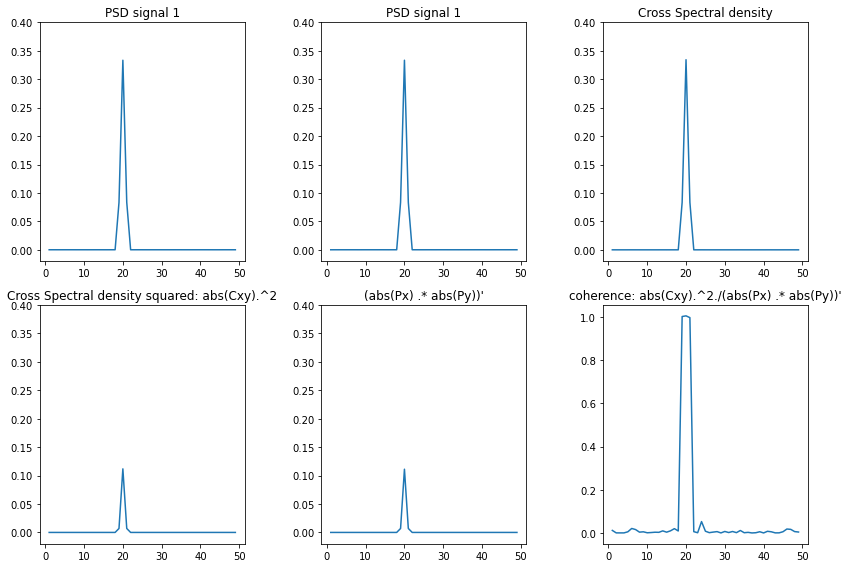

In [116]:
alpha=0                                          # sig1 phase shift
beta= np.pi                                      # sig2 phase shift
f1=20                                            # sig1 frequency
f2=20                                            # sig2 frequency
noise_amp = 0.25                                 # amplitude of noise
sig1 = np.sin(2*np.pi*f1*t+alpha) + noise_amp*np.random.randn(len(t))
sig2 = np.sin(2*np.pi*f2*t+beta) + noise_amp*np.random.randn(len(t))
# calculating power spectral density of signals:
fxx, Pxx = sig.welch(sig1, fs=fs, nperseg=1000)
fyy, Pyy = sig.welch(sig2, fs=fs, nperseg=1000)
ylim = [-0.02, 0.4]
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12,8))
ax[0,0].plot(fxx[freq_inds], Pxx[freq_inds])
ax[0,0].set_ylim(ylim); ax[0,0].set_title('PSD signal 1')
ax[0,1].plot(fyy[freq_inds], Pyy[freq_inds])
ax[0,1].set_ylim(ylim); ax[0,1].set_title('PSD signal 1')
ax[0,2].plot(f[freq_inds], abs(Pxy[freq_inds]))
ax[0,2].set_ylim(ylim); ax[0,2].set_title('Cross Spectral density')
ax[1,0].plot(f[freq_inds], abs(Pxy[freq_inds])**2)
ax[1,0].set_ylim(ylim); ax[1,0].set_title('Cross Spectral density squared: abs(Cxy).^2')
ax[1,1].plot(f[freq_inds], Pxx[freq_inds]*Pyy[freq_inds])
ax[1,1].set_ylim(ylim); ax[1,1].set_title("(abs(Px) .* abs(Py))'")
ax[1,2].plot(f[freq_inds], (abs(Pxy[freq_inds])**2)/(Pxx[freq_inds]*Pyy[freq_inds]))
ax[1,2].set_title("coherence: abs(Cxy).^2./(abs(Px) .* abs(Py))'")
fig.tight_layout()


### Exam 2005A: power spectrum:
#### The EEG of the Golden Unicorn is made up of three frequencies 7, 18 & 100Hz.
#### The amplitude of each component (frequency) is 10μV.
#### The waveform is sampled at 150 samples/sec for 1 second. 

#### Sketch and explain the power spectrum of the EEG. What are the X & Y axes?
#### What is the X scale resolution? What is the maximal frequency?

In [140]:
# fs = 150                                   # sampling frequency
# duration = 1                                   # in seconds
# dt = 1/fs                                      # amplitude of noise
# t = np.arange(0,duration,dt)
# f1=7; f2=18; f3=100
# signal = 10*np.sin(2*np.pi*f1*t)+10*np.sin(2*np.pi*f2*t)+10*np.sin(2*np.pi*f3*t)
# f, P = sig.welch(signal, fs=fs, nperseg=150)
# fig, ax = plt.subplots()
# ax.plot(f,P)